# Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

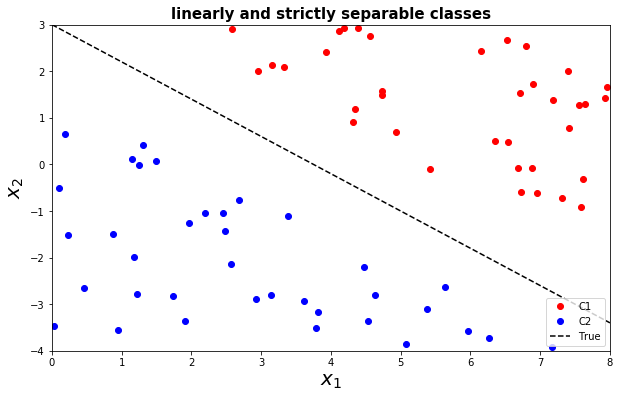

In [2]:
x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]

xp = np.linspace(0,8,100).reshape(-1,1)
ypt = -0.8*xp + 3

plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp, ypt, '--k', label='True')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

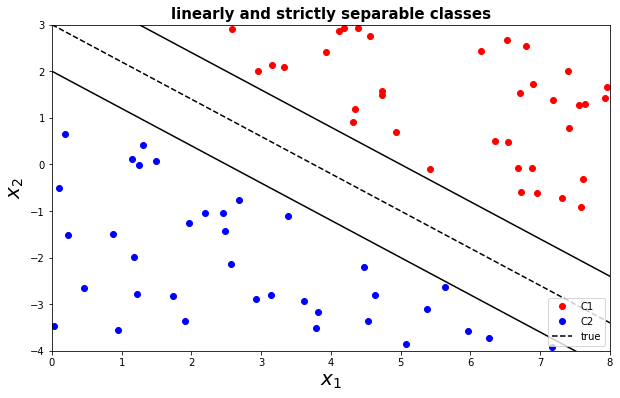

In [3]:
xp = np.linspace(0,8,100).reshape(-1,1)
ypt = -0.8*xp + 3

plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.plot(xp, ypt, '--k', label='true')
plt.plot(xp, ypt-1, '-k')
plt.plot(xp, ypt+1, '-k')
plt.title('linearly and strictly separable classes', fontweight = 'bold', fontsize = 15)
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4)
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

# Solution

In [4]:
import cvxpy as cvx

N = C1.shape[0]
M = C2.shape[0]

X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([M,1]), x1[C2], x2[C2]])

X1 = np.asmatrix(X1)
X2 = np.asmatrix(X2)

w = cvx.Variable([3,1])

obj = cvx.Minimize(cvx.norm(w))
const = [X1*w >= 1, X2*w <= -1]
prob = cvx.Problem(obj, const).solve()

w = w.value

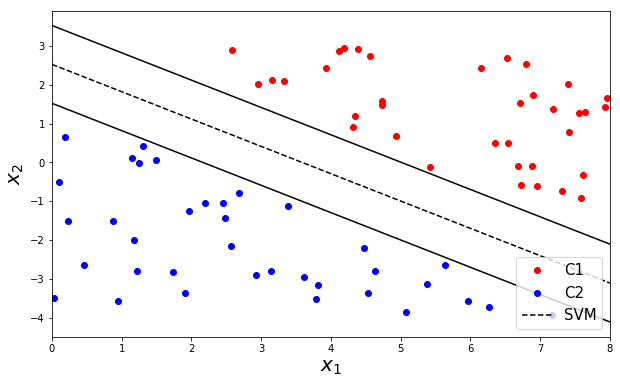

In [5]:
xp = np.linspace(0,8,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(X1[:,1], X1[:,2], 'ro', label='C1')
plt.plot(X2[:,1], X2[:,2], 'bo', label='C2')
plt.plot(xp, yp, '--k', label='SVM')
plt.plot(xp, yp-1, '-k')
plt.plot(xp, yp+1, '-k')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()